In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
def plot(x, t, x_label='t', y_label='x(t)', title='Вероятность безотказной работы'):
    plt.figure(figsize=(10, 7))
    plt.plot(x, t, 'r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.title(title)
    plt.show()

# Раздел 1

## Задание 1

In [4]:
maxT = 300
steps = 100000

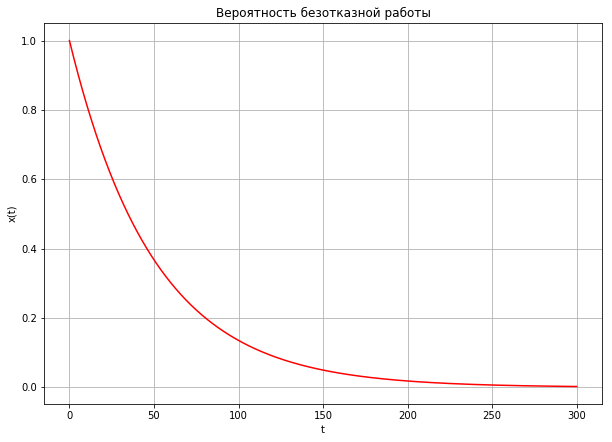

In [5]:
T = 50

x = np.linspace(0, maxT, steps)
R = 1 - stats.expon.cdf(x, loc=0, scale=T)

plot(x, R)

## Задание 2

In [6]:
maxT = 500
steps = 100000
l=48

In [7]:
x = np.linspace(0, maxT, steps)
R = 1 - stats.erlang.cdf(x, 2, loc=0, scale=l)

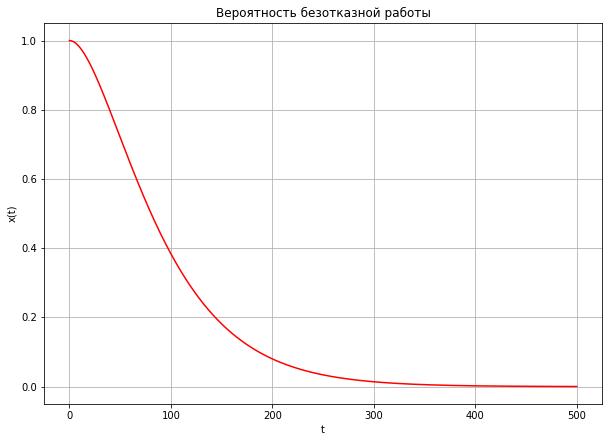

In [8]:
plot(x, R)

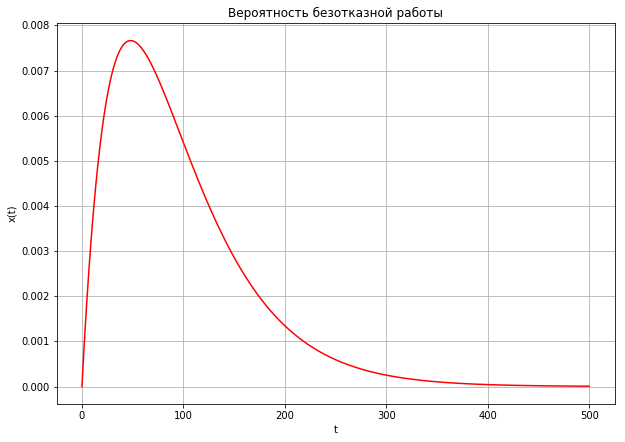

In [9]:
f = stats.erlang.pdf(x, 2, loc=0, scale=l)

plot(x, f)

## Задание 3

In [10]:
maxT = 25
steps = 100000

a = 0.02
b = 1

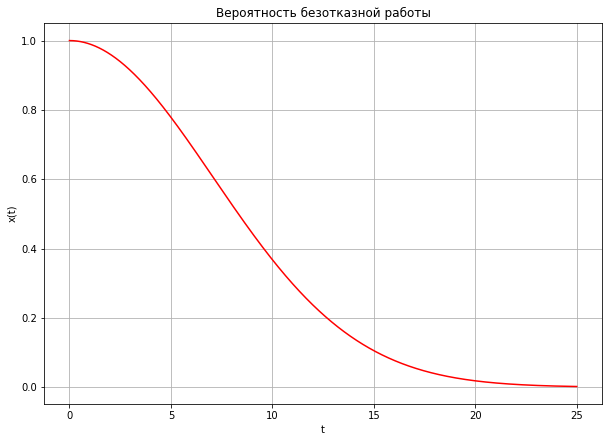

In [11]:
x = np.linspace(0, maxT, steps)
R = np.exp(-a / (b + 1) * x ** (b + 1))

plot(x, R)

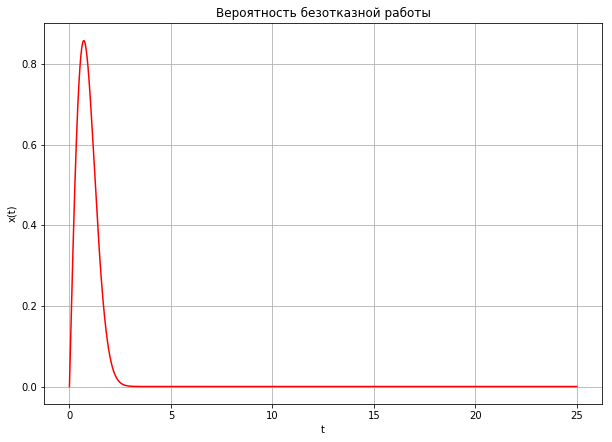

In [12]:
p = [ (b + 1) / b * math.pow(_x, b) * math.exp(-1 / b * math.pow(_x, b + 1)) for _x in x]

plot(x, p)

## Задание 4

In [13]:
maxT = 350
steps = 100

mu = 200
sigma = 30

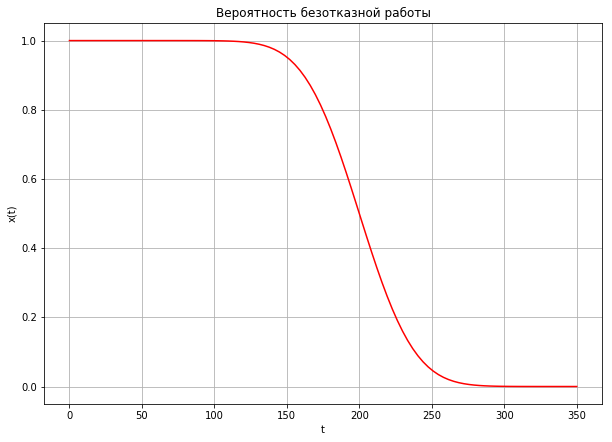

In [14]:
x = np.linspace(0, maxT, steps)
t = (mu - x) / sigma
R = stats.norm.cdf(t) / stats.norm.cdf(mu / sigma)

plot(x, R)

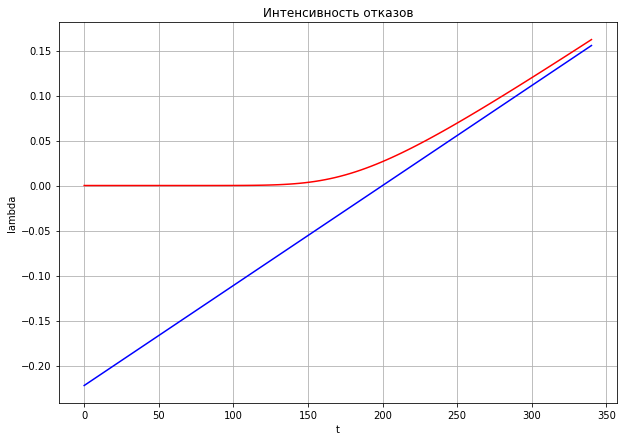

In [15]:
maxT = 340
x = np.linspace(0, maxT, steps)
lam = stats.norm.pdf(x, loc=mu, scale=sigma) / (1 - stats.norm.cdf(x, loc=mu, scale=sigma))

plt.figure(figsize=(10, 7))
plt.plot(x, lam, 'r')
plt.plot(x, (x - mu) / sigma ** 2, 'b')
plt.xlabel('t')
plt.ylabel('lambda')
plt.grid()
plt.title('Интенсивность отказов')
plt.show()

In [16]:
c = [0.19, 0.21, 0.14, 0.46]
T = [12, 31, 28, 22]
maxT = 350
steps = 100

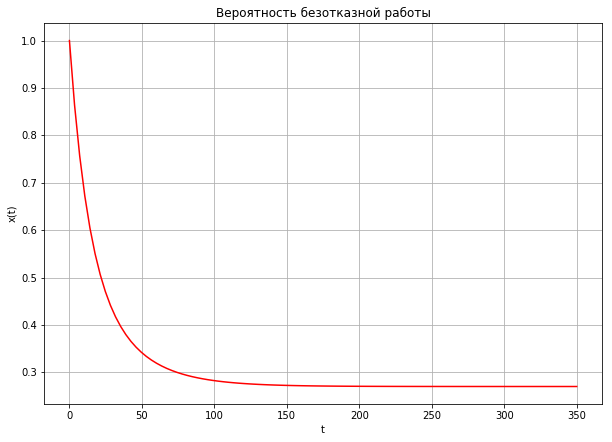

In [17]:
x = np.linspace(0, maxT, steps)

F = c[0] * stats.expon.cdf(x, loc=0, scale=T[0])
for i in range(len(T) - 1):
    F = F + c[i] * stats.expon.cdf(x, loc=0, scale=T[i])

R = 1 - F
plot(x, R)

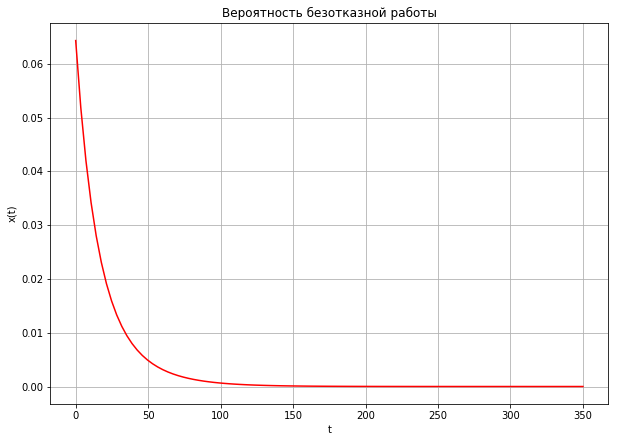

In [18]:
x = np.linspace(0, maxT, steps)

f = c[0] * stats.expon.pdf(x, loc=0, scale=T[0])
for i in range(len(T)):
    f = f + c[i] * stats.expon.pdf(x, loc=0, scale=T[i])

plot(x, f)   

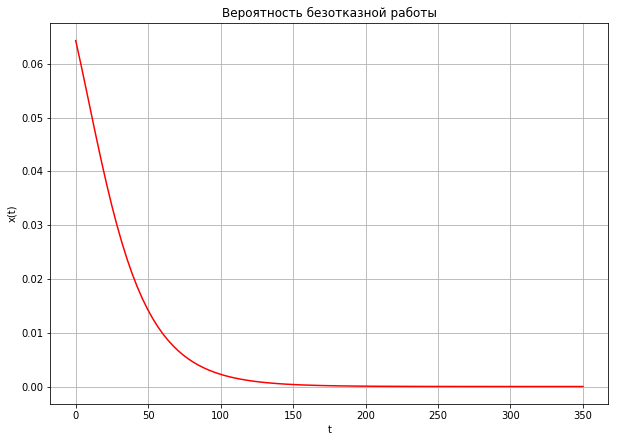

In [19]:
lam = f / (1 - F)

plot(x, lam)

# Раздел 2

## Задание 1

In [20]:
maxT = 2000
steps = 100
p = 0.025
lam = 0.003

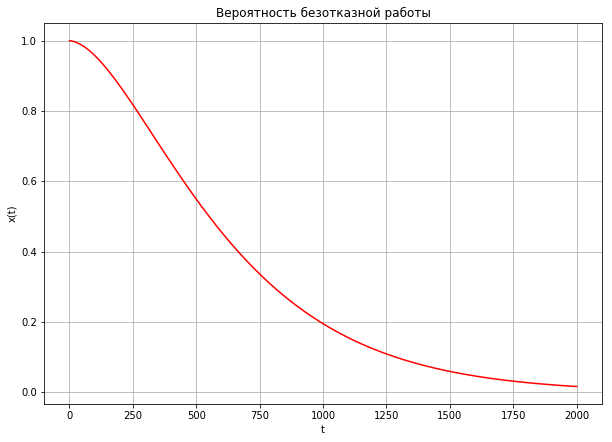

In [21]:
x = np.linspace(0, maxT, steps)
R = [math.exp(-lam * _x) * (1 + lam * (1 - p) * _x) for _x in x]

plot(x, R)

Вероятность безотказной работы : $ R(t) = e^{-\lambda t} (1 + \lambda (1 - p) t) $

## Задание 2

In [22]:
lam = 0.000001346
aplha = 0.01
t = -1 / (2 * lam) * np.log(1 - aplha) / 365
t = round(t, 3)

$ R(t) = 1 - F_1(t) F_2(t) = 1 - F^2(t) = 1 - e^{-2 \lambda t} \\ 
R(t) = 1 - \alpha \\
t = -\frac{1}{2 \lambda} (1 - \alpha) = 10.229 $

## Задание 3

In [23]:
steps = 1000000
alpha = 0.001

mu = 40
sigma = 30
eps = 1e-6

In [24]:
x = np.linspace(0, mu * 3, steps)
t = (mu - x) / sigma
R = stats.norm.cdf(t) / stats.norm.cdf(mu / sigma)

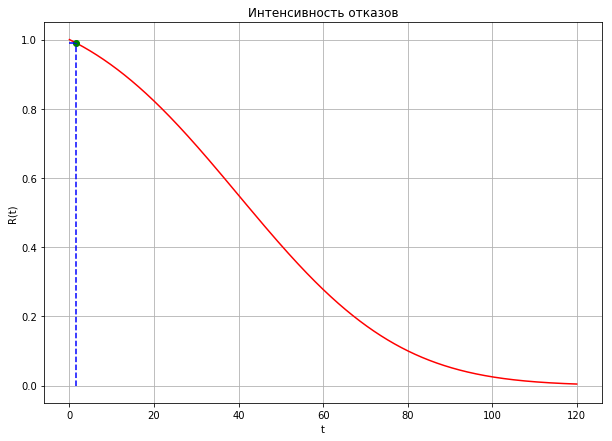

In [25]:
T = -1

for i in range(len(R)):
    r = R[i]
    if math.fabs(r - (1 - aplha)) < eps:
        T = i
        break
        
plt.figure(figsize=(10, 7))
plt.plot(x, R, 'r')
plt.plot(x[i], R[i], 'go', [0, x[i]], [R[i], R[i]], '--b', [x[i], x[i]], [0, R[i]], '--b')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.grid()
plt.title('Интенсивность отказов')
plt.show()

## Задание 4

In [26]:
maxT = 10000
steps = 10000
alpha = 0.001
lam = 0.002

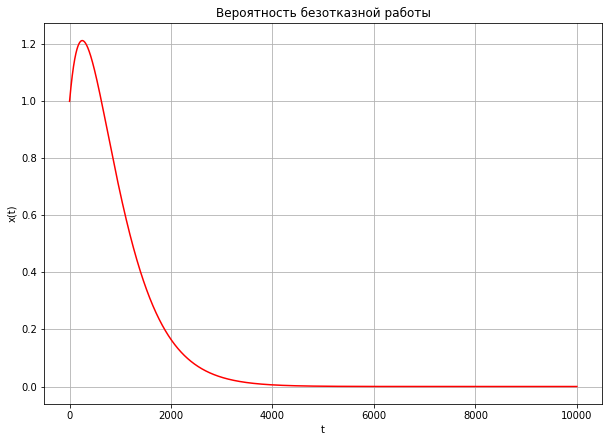

In [27]:
x = np.linspace(0, maxT, steps)
R = np.array([ 
              math.exp(-lam * t) * (2 * lam * t + 1)
              for t in x])

plot(x, R)